# Business Understanding

Justin Lee

This notebook is prepared for Electronic Arts (EA), a company renowned for producing video games. EA has observed that many major companies are now creating original video content and is keen to enter this market on a global scale. EA seeks three business recommendations on the types of films to produce.

The company requests that the focus be solely on animated movies, as it aligns with their expertise in video game production. For this analysis, we will consider only movies with a rating above 7.5, as this represents the minimum quality standard EA aims to achieve. Additionally, the analysis will be based on data from countries with at least thirty movie premieres in a given region.

# Data Understanding

This data is from IMDb that includes movie data. Each movie has a unique ID associated with it that contains its title, start year, runtime and genre. The movie ID associated with it also links it to its average rating, number of votes received, region and languaged it aired in, and other data such as directors, writers, and other principals. The three main tables we will use for our analysis are movie_ratings, movie_basics, and movie_akas. Each table's columns can be shown below.

Some initial limitations in this dataset include missing/NaN values. I will remove these NaN values from my dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Establish SQL connection
conn = sqlite3.connect('im.db')

In [3]:
# Understanding the columns in tables
pd.read_sql('''
SELECT *
FROM movie_ratings
limit 10
''', conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [4]:
pd.read_sql('''
select *
from movie_basics
limit 10
''', conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [5]:
pd.read_sql('''
select *
from movie_akas
limit 10
''',conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


# Data Preparation

To filter my data to my stakeholder's specific requests, I've created different dataframes for each business recommendation.

First I broke up different runtime (in minutes) dataframes and removed all NaN values. I created four different dataframes to break up runtime between 30 to 60 minutes, 60 to 90, 90 to 120, and 120 to 150. 

Second, I created a new dataframe just to showcase animation movies with their total average rating. I also only showcased data that had a rating above 7.5 as per our client's request. To make it easier to read, I've ordered the data in descending order.

Third, I created a new dataframe that showcased the number of regions with the lowest average votes, and to make it easier to read I've ordered the data in asecnding order. This data is also filtered by having at least thirty movies aired in a given region as per our client's request.

### Runtime Dataframes

Runtime Dataframe 30-60 minutes

In [6]:
# Removing NaN values and established dataframes in minute lengths
runtime_30to60_df = '''
SELECT AVG(averagerating) as average_rating
FROM movie_akas
    JOIN movie_ratings USING(movie_id)
    JOIN movie_basics USING(movie_id)
WHERE runtime_minutes >= 30
    AND runtime_minutes < 60
    AND runtime_minutes != 'NaN'
'''

pd.read_sql(runtime_30to60_df, conn)

,average_rating
0,7.07553


Runtime Dataframe 60-90 minutes

In [7]:
runtime_60to90_df = '''
SELECT AVG(averagerating) as average_rating
FROM movie_akas
    JOIN movie_ratings USING(movie_id)
    JOIN movie_basics USING(movie_id)
WHERE runtime_minutes >= 60
    AND runtime_minutes < 90
    AND runtime_minutes != 'NaN'
'''

pd.read_sql(runtime_60to90_df, conn)

,average_rating
0,6.064124


Runtime Dataframe 90-120 minutes

In [8]:
runtime_90to120_df = '''
SELECT AVG(averagerating) as average_rating
FROM movie_akas
    JOIN movie_ratings USING(movie_id)
    JOIN movie_basics USING(movie_id)
WHERE runtime_minutes >= 90
    AND runtime_minutes < 120
    AND runtime_minutes != 'NaN'
'''

pd.read_sql(runtime_90to120_df, conn)

,average_rating
0,6.210121


Runtime Dataframe 120-150 minutes

In [9]:
runtime_120to150_df = '''
SELECT AVG(averagerating) as average_rating
FROM movie_akas
    JOIN movie_ratings USING(movie_id)
    JOIN movie_basics USING(movie_id)
WHERE runtime_minutes >= 120
    AND runtime_minutes < 150
    AND runtime_minutes != 'NaN'
'''

pd.read_sql(runtime_120to150_df, conn)

,average_rating
0,6.723997


### Animation Movies and Overall Average Rating Dataframe

Dataframe filtered by animation genre and above an average rating of 7.5.

In [10]:
# Filtering for Animation movies and average ratings above 7.5
q2 = '''
SELECT DISTINCT genres, averagerating
FROM movie_basics
    JOIN movie_ratings USING(movie_id)
    JOIN movie_akas USING(movie_id)
WHERE genres LIKE '%Animation%'
    AND averagerating > 7.5
GROUP BY genres
ORDER BY averagerating DESC
'''

pd.read_sql(q2, conn)

,genres,averagerating
0,"Animation,Fantasy",8.6
1,"Animation,Documentary,War",8.5
2,"Animation,Documentary",8.5
3,"Animation,Documentary,Family",8.4
4,"Animation,Crime,Documentary",8.4
5,"Animation,Comedy,Crime",8.4
6,"Animation,Biography,Documentary",8.4
7,"Animation,History",8.3
8,"Adventure,Animation,Sci-Fi",8.3
9,"Animation,Fantasy,Romance",8.2


In [11]:
genres_averagerating_df = pd.read_sql(q2, conn)

### Region and Average Votes Dataframe

Dataframe filtered with movie air counts of at least 30 and ordered in ascending order by lowest average votes.

In [12]:
# Showing the ten worst average ratings of movies airing in regions with at least 30 premiers
q3 = '''
SELECT region AS distinct_regions, COUNT(*) AS region_count, AVG(numvotes) AS average_votes
FROM movie_basics
    JOIN movie_ratings USING(movie_id)
    JOIN movie_akas USING(movie_id)
GROUP BY region
HAVING COUNT(region) > 30
ORDER BY average_votes ASC
LIMIT 10;
'''

pd.read_sql(q3, conn)

,distinct_regions,region_count,average_votes
0,NP,116,73.982759
1,NG,72,126.180556
2,MA,75,162.533333
3,IQ,35,298.142857
4,MN,39,309.871795
5,PS,35,649.914286
6,TN,40,686.050000
7,PK,126,1036.507937
8,BY,34,1103.647059
9,DZ,41,1314.951220


In [13]:
region_avgvotes_df = pd.read_sql(q3, conn)

# Data Analysis and Visualization

These visualizations will help to support our three business recommendations. From these visualizations we can determine the best runtime in minutes, which animation movie genre typically performs the best, and which global regions we should avoid airing movies in based on vote count.

### Selecting Best Runtime In Minutes

These four bar charts depict the best average rating from runtimes between 30 to 60 minutes, 60 to 90 minutes, 90 to 120 minutes, and 120 to 150 minutes. As we can see here, the runtimes that have the highest average rating are movies between 30 to 60 minutes in length.

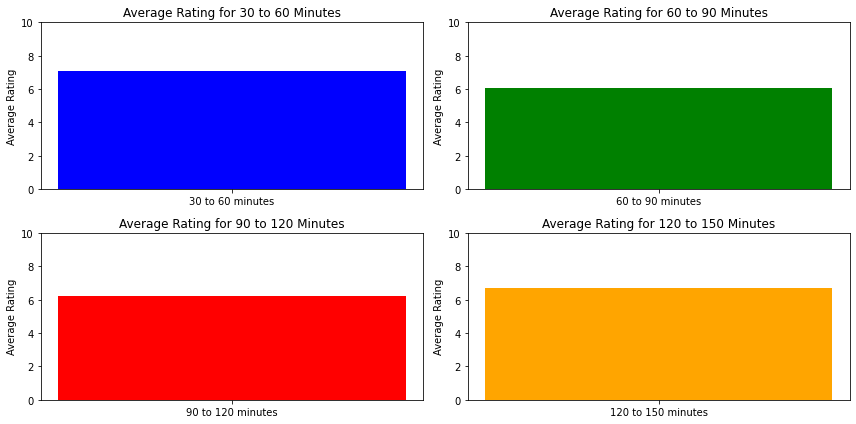

In [14]:
# Dataframes
runtime_30to60_df = pd.DataFrame({'average_rating': [7.07553]})
runtime_60to90_df = pd.DataFrame({'average_rating': [6.064124]})
runtime_90to120_df = pd.DataFrame({'average_rating': [6.210121]})
runtime_120to150_df = pd.DataFrame({'average_rating': [6.723997]})

# Extract average ratings from the dataframes
avg_rating_30to60 = runtime_30to60_df['average_rating'].iloc[0]
avg_rating_60to90 = runtime_60to90_df['average_rating'].iloc[0]
avg_rating_90to120 = runtime_90to120_df['average_rating'].iloc[0]
avg_rating_120to150 = runtime_120to150_df['average_rating'].iloc[0]


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot the average ratings
axs[0, 0].bar(['30 to 60 minutes'], [avg_rating_30to60], color='blue')
axs[0, 0].set_ylim(0, 10)
axs[0, 0].set_title('Average Rating for 30 to 60 Minutes')
axs[0, 0].set_ylabel('Average Rating')

axs[0, 1].bar(['60 to 90 minutes'], [avg_rating_60to90], color='green')
axs[0, 1].set_ylim(0, 10)
axs[0, 1].set_title('Average Rating for 60 to 90 Minutes')
axs[0, 1].set_ylabel('Average Rating')

axs[1, 0].bar(['90 to 120 minutes'], [avg_rating_90to120], color='red')
axs[1, 0].set_ylim(0, 10) 
axs[1, 0].set_title('Average Rating for 90 to 120 Minutes')
axs[1, 0].set_ylabel('Average Rating')

axs[1, 1].bar(['120 to 150 minutes'], [avg_rating_120to150], color='orange')
axs[1, 1].set_ylim(0, 10)
axs[1, 1].set_title('Average Rating for 120 to 150 Minutes')
axs[1, 1].set_ylabel('Average Rating')

plt.tight_layout()

plt.show()

### Selecting Best Animation Genre

This bar chart depicts the best animation genre to create. The bar chart is ordered in descending order based on average rating per genre. In this case, we can see that the "Animation, Fantasy" genre has the highest average rating compared to any other animation genre.

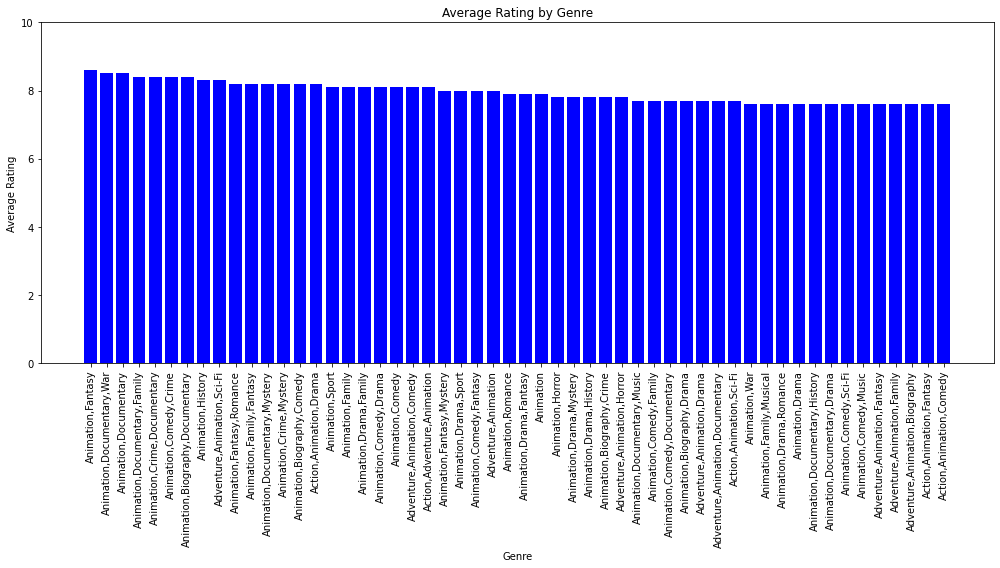

In [15]:
genres = genres_averagerating_df['genres']
average_ratings = genres_averagerating_df['averagerating']

plt.figure(figsize=(14, 8))
plt.bar(genres, average_ratings, color='blue')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=90)  # Rotate genre names for better readability
plt.ylim(0, 10)  # Ratings are out of 10
plt.tight_layout()
plt.show()

### Selecting Regions to Avoid Airing Movies

This stem plot will help us determine which regions to avoid airing movies in, as our client is looking to enter the movie industry on a global level. These ten regions had the lowest performing average votes (of regions that had at least thirty movies airing in it). The data is ordered in ascending order, and the ten lowest performing regions were NP (Nepal), NG (Nigeria), MA (Morocco), IQ (Iraq), MN (Mongolia), PS (Palestinian Territory), TN (Tunisia), PK (Pakistan), BY (Belarus), and DZ (Algeria).

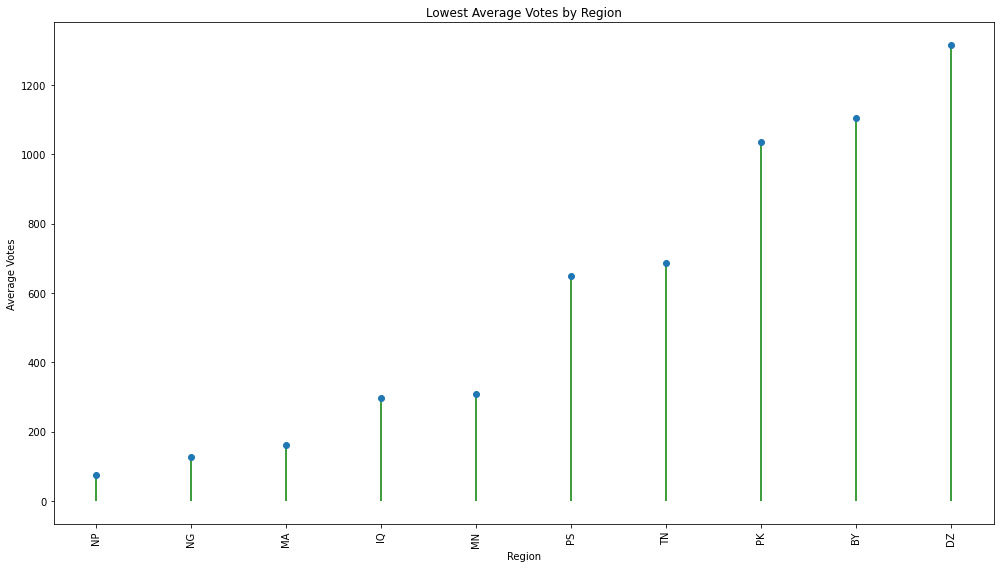

In [16]:
# Extract data for plotting
regions = region_avgvotes_df['distinct_regions']
average_votes = region_avgvotes_df['average_votes']

# Create the lollipop chart
plt.figure(figsize=(14, 8))
plt.stem(regions, average_votes, linefmt='green', markerfmt='o', basefmt=' ')
plt.xlabel('Region')
plt.ylabel('Average Votes')
plt.title('Lowest Average Votes by Region')
plt.xticks(rotation=90)  # Rotate region names for better readability
plt.tight_layout()
plt.show()

# Conclusion

This analysis leads me to three recommendations for Electronic Arts (EA) to enter the movie creation space.

1) Create movies that have runtimes between 30-60 minutes. Compared to other runtimes, movies from this dataset and runtime length typically scored the highest average rating. 

2) Create "Animation, Fantasy" movies. Of all Animation genres, the "Animation, Fantasy" movies scored the highest average rating. 

3) Avoid airing movies in Nepal, Nigeria, Morocco, Iraq, Mongolia, Palestinian Territory, Tunisia, Pakistan, Belarus and Algeria as these ten regions scored the lowest on average votes of regions where at least thrity movies aired.

# Limitations and Next Steps

Some limitations arose from my analysis and the way I manipulated the dataframes to support these business recommendations.

1) These dataframes were created based on conditions on each of their respective recommendations, but is not filtered for all three prompts. For example, in selecting which regions had the lowest amount of votes - these were lowest votes across all genres instead of just Animation movies. Nepal could have the lowest amount of votes across all movies, but could perform better in Animation genres compared to other regions. The next step would be to create an analysis specific to all conditions of my client.

2) This data had missing NaN values. For my analysis, I've just excluded these values. If we had a value for these NaN values we could have led to a more accurate conclusion. A next step would be to obtain values for these missing NaN values to perform a more accurate analysis.

3) This data is only inclusive of IMDb data. There are tons of other movie datasets out there and of different genres, years, scoring systems, etc. To give my client more well-rounded business recommendations, the next stpe would be to create an analysis across different types of movie data.